# Adjuster Problem: Nested EGM vs FUES Finite Horizon `[WIP]`

Comparing implemented code version

## Using Root-Finding and FUES

[Original Paper](https://github.com/akshayshanker/FUES_EGM/blob/main/fues_egm_04092023.pdf), [Original Code](https://github.com/akshayshanker/FUES_EGM/blob/main/examples/housing_frictions.py); [Notes to derive the math](https://www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/Consumption/Durables/)

Mathematically the problem is the following:

Adjuster Problem:
\begin{align}
    v_t^{adj}(x_t) &= \max_{c_t,d_t} u(c_t,d_t) + \beta \mathbb{E}_t \Big(v_{t+1}(n_{t+1}, m_{t+1})\Big)\\
    & \text{s.t.}\\
    a_t &= x_t - c_t - d_t \geq 0 \\
    x_t &= (1 - \tau)n_t + m_t \\
    m_{t+1} &= Ra_t + y_{t+1}\\
    n_{t+1} &= (1 - \delta)d_t
\end{align}

Where  $v_{t+1}(n_{t+1}, m_{t+1})$ incorporates the optimal choice in the next period; eg the agent adjusts for the combination of state variables in which the conditional value function of adjusting exceeds the one of the keeper.

Rewriting $v_{t+1}(n_{t+1}, m_{t+1})$:
\begin{align}
    v_t^{adj}(x_t) &= \max_{c_t,d_t} u(c_t,d_t) + \beta \mathbb{E}_t \Big(v_{t+1}((1 - \delta)d_t, Ra_t + y_{t+1})\Big)\\
    & \text{s.t.}\\
    a_t &= x_t - c_t \geq 0 \\
    x_t &= (1 - \tau)n_t + m_t \\
\end{align}

Adding also the last Constraint:
\begin{align}
    v_t^{adj}(x_t) &= \max_{c_t,d_t} u(c_t,d_t) + \beta \mathbb{E}_t \Big(v_{t+1}((1 - \delta)d_t, R((1 - \tau)n_t + m_t - c_t - d_t) + y_{t+1})\Big)
\end{align}

FOC wrt Non-Durable Consumption:
\begin{align}
    \frac{\partial v_t^{adj}}{\partial c_t} &= u_c(c_t, d_t) \geq \beta R \mathbb{E}_t [v_{t+1}^m]
\end{align}

FOC wrt Durable Consumption:
\begin{align}
    \frac{\partial v_t^{adj}}{\partial d_t} &= u_d(c_t, d_t) \geq \beta R \mathbb{E}_t[v_{t+1}^m] -\beta * (1 - \delta)\mathbb{E}_t[v_{t+1}^d]\\
    &= u_d(c_t, d_t) \geq u_c(c_t, d_t) - \beta * (1 - \delta)\mathbb{E}_t[v_{t+1}^d]
\end{align}
  
We can calculate $c$ using the FOC with respect to $c$ and fixing $d_t$. Additionally, we can use the FOC with respect to $d$ to calculate the multiple roots. In essence, we solve for $a_{t}$ using FOC wrt $d$ where $c$ is calculated using EGM and FOC wrt $c$


EGM step: Fixing $d_t$ what is the optimal $c_t$?

\begin{align}
    c_t &= u_{c}^{-1}( \beta R \mathbb{E}_t [v_{t+1}^m])
\end{align}

We can find the end-of-period assets which solves the 2nd FOC while evaluating $c^*$ with the first FOC. This is the root to the following expression:
\begin{align}
    0 &= u_d(c_t, d_t) - u_c(c_t, d_t) + \beta * (1 - \delta)\mathbb{E}_t[v_{t+1}^d]
\end{align}

Note that there will be two roots for each fixed end-of-period durable stock.

### Naming conventions
1. End-of-Period Marginal Value Function (qFunc): $\beta R \mathbb{E}_t [v_{t+1}^m]$
2. End-of-Period Marginal Value Function wrt Durables (qFuncD): $\beta * (1 - \delta)\mathbb{E}_t[v_{t+1}^d]$

### Algorithm
1. End-of-Period Marginal Value Functions
- Create exogenous grids of end-of-period state variables (a, d)
- Calculate expected beginning-of-period state variables in next period $(m_{t+1} = a_t*R + E[y_{t+1}], n_{t+1} = (1 - \delta)*d_t)$
- Evaluate Next periods Marginal Value Functions on these points
- Get qFunc(a,d) and qFuncD(a,d)

2. Preparations:
- Fix an exogenous $d_t$ grid: End of period durable stock
- Initialize empty lists for roots (a), policy function (c), endogeneous wealth (x), current period value (v)

3. For each $d$ in exogenous d-Grid:
- solve for the following root (a) given (d)
    \begin{align}
    func(a,d):\\
    c_t &= u_{c}^{-1}( \beta R \mathbb{E}_t [v_{t+1}^m(a,d)]) \\
    0 &= u_d(c_t, d_t) - u_c(c_t, d_t) + \beta * (1 - \delta)\mathbb{E}_t[v_{t+1}^d(a,d)]
    \end{align}
- Solve for c policy using EGM step (could do that in above's step)
- Calculate endogenous wealth (x) using BC: x = a + c + d
- Evaluate value 
- Append to list

4. FUES
- Get optimal policy functions using FUES

# Beginning-of-Period Marginal Value Functions

We have two marginal value functions. The first one: 
\begin{align}
    \frac{\partial V_t(n_t,m_t)}{\partial m_t} &= \frac{\partial u(c_T, d_T)}{\partial c_T}
\end{align}

Now, we want to know 
\begin{align}
    \frac{\partial V_t(n_t,m_t)}{\partial n_t}
\end{align}
Which depends on the discrete choice within the period.

To simplify things, we start at the terminal period. Now, the problem is given by:

## a) Keeper:
\begin{align}
	v_T^{keep}(n_T,m_T) &= \max_{c_T} u(c_T,n_T) \\
	& \text{s.t.} \nonumber\\
	a_T &= m_T- c_T \geq 0
\end{align}

Now, taking the FOC: Note that $c_T = m_T$
\begin{align}
    \frac{\partial V_T(n_T,m_T)}{\partial n_T} &= \frac{\partial u(c_T, n_T)}{\partial c_T} \frac{\partial c_T}{\partial n_T} +  \frac{\partial u(c_T, n_T)}{\partial n_T} \frac{\partial n_T}{\partial n_T} \\
    &= \frac{\partial u(m_T, n_T)}{\partial m_T} \underbrace{\frac{\partial m_T}{\partial n_T}}_0 +  \frac{\partial u(c_T, n_T)}{\partial n_T} \underbrace{\frac{\partial n_T}{\partial n_T}}_1 \\
 &= \frac{\partial u(c_T, n_T)}{\partial n_T}
\end{align}





## b) Adjuster:

\begin{align}
	v_T^{adj}(x_T) &= \max_{c_T,d_T} u(c_T,d_T) \\
	& \text{s.t.} \nonumber \\
	x_T &= m_T + (1 - \tau) n_T \\
	a_T &= x_T - c_T - d_T \geq 0 
\end{align}

Which we can re-write as:
\begin{align}
	v_T^{adj}(x_T) &= \max_{c_T} u(c_T,m_T + (1 - \tau) n_T - c_T - a_T)
\end{align}
And therefore the FOC:
\begin{align}
    \frac{\partial U}{\partial c_T} &= \frac{\partial U}{\partial d_T}
\end{align}


\begin{align}
    \frac{\partial V_T(m_T + (1 - \tau) n_T)}{\partial n_T} &= \frac{\partial u(c_T, d_T)}{\partial c_T} \frac{\partial c_T}{\partial n_T} +  \frac{\partial u(c_T, d_T)}{\partial d_T} \frac{\partial d_T}{\partial n_T} \\
    &= \frac{\partial u(c_T, d_T)}{\partial c_T} \frac{\partial c_T}{\partial n_T} +  \frac{\partial u(c_T, d_T)}{\partial d_T}  \frac{\partial \Big(m_T + (1 - \tau) n_T - c_T - a_T\Big)}{\partial n_T} \\
    &= \frac{\partial u(c_T, d_T)}{\partial c_T} \frac{\partial c_T}{\partial n_T} + (1 - \tau) * \frac{\partial u(c_T, d_T)}{\partial c_T} - \frac{\partial u(c_T, d_T)}{\partial c_T} \frac{\partial c_T}{\partial n_T}\\
    &= (1 - \tau) * \frac{\partial u(c_T, d_T)}{\partial c_T}
\end{align}

### Beginning-of-Period Marginal Value Function wrt $n_t$ for any $t$

### For Keeper:
\begin{align}
    v_t^{keep}(n_t,m_t) &= \max_{c_t} u(c_t,n_t) + \beta \mathbb{E}_t \Big(v_{t+1}(n_{t+1}, m_{t+1})\Big)\\
    & \text{s.t.}\\
    a_t &= m_t - c_t \geq 0 \\
    m_{t+1} &= Ra_t + y_{t+1}\\
    n_{t+1} &= (1 - \delta)n_t
\end{align}

With the Euler Equation:
\begin{align}
    \frac{\partial U(c_t,d_t)}{\partial c_t} &= \frac{\partial v_{t+1}}{\partial m_{t+1}}
\end{align}

\begin{align}
    \frac{\partial v_t}{\partial n_t} &= \frac{\partial(c_t, d_t)}{\partial n_t} + \frac{\partial v_{t+1}}{\partial n_t} \\
    &=  \frac{\partial(c_t, d_t)}{\partial c_t} \frac{\partial c_t}{\partial n_t} + \frac{\partial(c_t, d_t)}{\partial n_t} \frac{\partial n_t}{\partial n_t} + \frac{\partial v_{t+1}}{\partial n_t}\\
    &= \frac{\partial v_{t+1}}{\partial m_{t+1}} \frac{\partial c_t}{\partial n_t} + \frac{\partial(c_t, d_t)}{\partial n_t} \frac{\partial n_t}{\partial n_t} + \frac{\partial v_{t+1}}{\partial n_t}\\
    &= \frac{\partial(c_t, d_t)}{\partial n_t}  + \beta \Lambda^{n}_{t+1}
\end{align}




### For Adjuster:

\begin{align}
    v_t^{adj}(x_t) &= \max_{c_t,d_t} u(c_t,d_t) + \beta \mathbb{E}_t \Big(v_{t+1}(n_{t+1}, m_{t+1})\Big)\\
    & \text{s.t.}\\
    a_t &= x_t - c_t - d_t\geq 0 \\
    m_{t+1} &= Ra_t + y_{t+1}\\
    n_{t+1} &= (1 - \delta)n_t
\end{align}

With the FOCs:
\begin{align}
    \frac{\partial v_t^{adj}}{\partial m_t}: \frac{\partial U(c_t, d_t)}{\partial c_t} &= R\beta \frac{\partial v_{t+1}(n_{t+1},m_{t+1})}{\partial m_{t+1}} \\
    \frac{\partial v_t^{adj}}{\partial n_t}: \frac{\partial U(c_t, d_t)}{\partial d_t} &= \frac{\partial U(c_t, d_t)}{\partial c_t} - R\beta(1 - \delta) \frac{\partial v_{t+1}(n_{t+1},m_{t+1})}{\partial n_{t+1}}
\end{align}

Using FOC and intertemporal budget constraint:
\begin{align}
\frac{\partial v_t^{adj}}{\partial n_t} &= \frac{\partial u(c_t, d_t)}{\partial c_t} \frac{\partial c_t}{\partial n_t} + \frac{\partial u(c_t, d_t)}{\partial d_t} \frac{\partial d_t}{\partial n_t}+ \beta \frac{\partial v_{t+1}(n_{t+1}, m_{t+1})}{\partial n_{t+1}} \frac{\partial n_{t+1}}{\partial n_t} + \beta \frac{\partial v_{t+1}(n_{t+1}, m_{t+1})}{\partial m_{t+1}} \frac{\partial m_{t+1}}{\partial n_t}
\end{align}

Therefore, denoting $\mathcal{I}$ for adjuster, we have:
\begin{align}
    \Lambda^{n}_{t} &= \frac{\partial V_t}{\partial n_t} = \mathcal{I} \frac{\partial U(c_{t+1}, d_{t+1})}{\partial c_t} (1 - \tau) + (1 - \mathcal{I})\Bigg( \frac{\partial U(c_{t+1}, d_{t+1})}{\partial d_t} + \Lambda^n_{t+1}  \Bigg)
\end{align}

In [1]:
### Packages
from HARK.econforgeinterp import LinearFast
from utilities_Durable import construct_grid
from HARK.ConsumptionSaving.ConsIndShockModel import utility, utility_inv, utilityP_inv
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType, init_idiosyncratic_shocks

from HARK.interpolation import LowerEnvelope, LowerEnvelope2D
from DurableModel_Nested_EGM import DurableConsumerType_Latest as DurableConsumerType_NestedEGM
from DurableModel_FUES import DurableConsumerType_Latest as DurableConsumerType_FUES
from utilities_Durable import construct_grid, durable_adjusting_function, MargValueFuncCRRA_dur, EGM_njit, UpperEnvelope_njit, durable_adjusting_function_fast, durable_solution_function_fast
from HARK.interpolation import ValueFuncCRRA
from HARK.distribution import expected


from HARK.core import MetricObject
from copy import deepcopy

import numpy as np
import scipy as sp
from scipy.optimize import fsolve, root, brentq
import matplotlib.pyplot as plt
from matplotlib import cm
from numba import njit, float64, int32

from FUES import FUES
from utilities_Durable import decision_function_latest

import time

In [2]:
# Overall Variables 
T_cycles = 3
PermShk = 0.06
TranShk = 0.2
Rfree = 1.03
DiscFac = 0.965

# Durable Specific
alpha = 1
delta = 1
tau = 0
d_ubar = 0.0
nNrmMin = 0.0
nNrmMax = 1.0
nNrmCount = 2
mNrmMin = 0.0
mNrmMax = 25.0
mNrmCount = 100
xNrmCount = 100

In [3]:
mNrmGrid = construct_grid(mNrmMin, mNrmMax, mNrmCount, "nonlinear", 3)
nNrmGrid = np.zeros_like(mNrmGrid)

In [4]:
#### For Comparison, define parameters for the IndShockConsumerType
init_indshock = dict(
    init_idiosyncratic_shocks,
    **{
        "Rfree": Rfree,  # Interest factor on assets
        "DiscFac": DiscFac, # Intertemporal discount factor
        "LivPrb" : [1.00] * T_cycles, # Survival probability
        ### No income shocks
        "PermGroFac": [1.0] * T_cycles,
        "PermShkCount": 5,
        "PermShkStd": [PermShk] * T_cycles,
        "TranShkCount": 5,
        "TranShkStd": [TranShk] * T_cycles,
        "UnempPrb": 0.0,
        "UnempPrbRet": 0.0,
        ### Others
        "BoroCnstArt": 0,
        "cycles": 1,
        "T_cycle": T_cycles,
        "vFuncBool": True,
        # To construct grids differently:
        "NestFac": 3,
        "grid_type": "exp_mult",
        "CubicBool": False,
    }
)

In [5]:
### Solve
init_durable = dict(
    init_idiosyncratic_shocks,
    **{
    # Parameters shared with the perfect foresight model
    "CRRA": 2,  # Coefficient of relative risk aversion
    "Rfree": [Rfree] * T_cycles, # Interest factor on assets
    "DiscFac": [DiscFac] * T_cycles,  # Intertemporal discount factor
    "LivPrb": [1.00] * T_cycles,    # Survival probability
    "PermGroFac": [1.00] * T_cycles,  # Permanent income growth factor

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd": [PermShk] * T_cycles,  # Standard deviation of log permanent shocks to income
    "PermShkCount": 5,  # Number of points in discrete approximation to permanent income shocks
    "TranShkStd": [TranShk] * T_cycles,# Standard deviation of log transitory shocks to income
    "TranShkCount": 5,  # Number of points in discrete approximation to transitory income shocks
    "UnempPrb": [0.0] * T_cycles,  # Probability of unemployment while working
    "IncUnemp": [0.0] * T_cycles,  # Unemployment benefits replacement rate
    "UnempPrbRet": [0.0] * T_cycles,  # Probability of "unemployment" while retired
    "IncUnempRet": [0.0] * T_cycles,  # "Unemployment" benefits when retired
    "T_retire": 0,  # Period of retirement (0 --> no retirement)
    "tax_rate": 0.0,  # Flat income tax rate (legacy parameter, will be removed in future)

    # A few other parameters
    "BoroCnstArt": [0.0] * T_cycles,  # Artificial borrowing constraint; imposed minimum level of end-of period assets
    "vFuncBool": False,  # Whether to calculate the value function during solution
    "CubicBool": False,  # Preference shocks currently only compatible with linear cFunc
    "T_cycle": T_cycles,  # Number of periods in the cycle for this agent type

    # VARIABLES FOR DURABLECONSUMERTYPE
    "alpha": alpha,  # Cobb-Douglas parameter for non-durable good consumption in utility function
    "dDepr": delta,  # Depreciation Rate of Durable Stock
    "adjC": tau,  # Adjustment costs
    "d_ubar": d_ubar,  # Minimum durable stock for utility function
    
    # For Grids
    "nNrmMin": nNrmMin,
    "nNrmMax": nNrmMax,
    "nNrmCount": nNrmCount,
    "mNrmMin": mNrmMin,
    "mNrmMax": mNrmMax,  
    "mNrmCount": mNrmCount,
    "xNrmCount": xNrmCount,
    
    # To construct grids differently
    "NestFac": 3,
    "grid_type": 'exp_mult',
    "solve_terminal": True,
    "expected_BOOL": False,
    "UpperEnvelope": 'DCEGM',
    "AdjX": True,
    }
)

# Test 1: One Non-durable ($\alpha = 1$, $\delta = 1$, $\tau = 0$)

In [6]:
### IndShockConsumerType: Life
start = time.time()
IndShockExample_OneNonDurable_life = IndShockConsumerType(**init_indshock)
IndShockExample_OneNonDurable_life.update()
IndShockExample_OneNonDurable_life.solve()#(verbose=False)
end = time.time()
time_IndShock = end - start
print("time used: ", time_IndShock, " seconds")

time used:  0.0713045597076416  seconds


In [7]:
### DurableConsumerType: Life
start = time.time()
DurableExample_NestedEGM_OneNonDurable_life = DurableConsumerType_NestedEGM(**init_durable)
DurableExample_NestedEGM_OneNonDurable_life.update_income_process()
DurableExample_NestedEGM_OneNonDurable_life.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  4.924686431884766  seconds


In [8]:
### DurableConsumerType: Life
start = time.time()
DurableExample_FUES_OneNonDurable_life = DurableConsumerType_FUES(**init_durable)
DurableExample_FUES_OneNonDurable_life.update_income_process()
DurableExample_FUES_OneNonDurable_life.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  0.16239237785339355  seconds


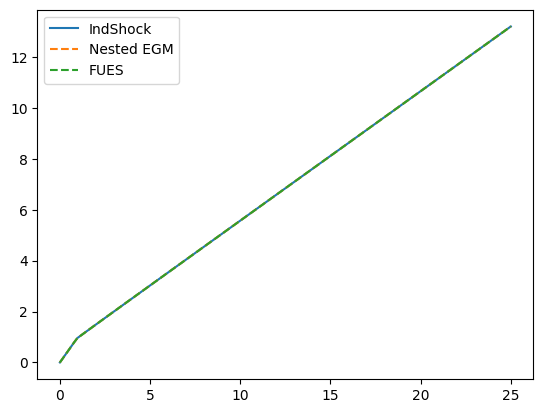

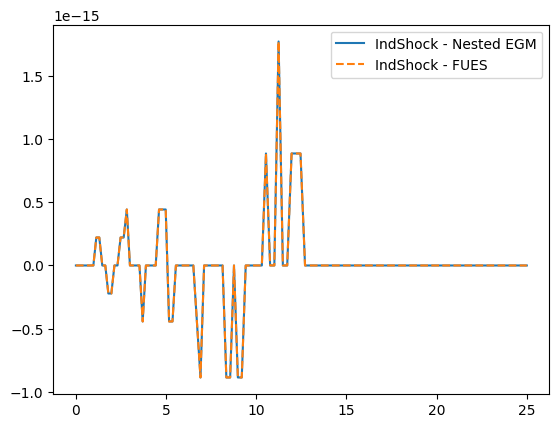

In [9]:
t = 2
plt.plot(mNrmGrid, IndShockExample_OneNonDurable_life.solution[t].cFunc(mNrmGrid), label = 'IndShock')
plt.plot(mNrmGrid, DurableExample_NestedEGM_OneNonDurable_life.solution[t].cFunc(nNrmGrid, mNrmGrid), '--', label = 'Nested EGM')
plt.plot(mNrmGrid, DurableExample_FUES_OneNonDurable_life.solution[t].cFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES')
plt.legend()
plt.show()

plt.plot(mNrmGrid, IndShockExample_OneNonDurable_life.solution[t].cFunc(mNrmGrid) - DurableExample_NestedEGM_OneNonDurable_life.solution[t].exFunc(nNrmGrid, mNrmGrid), label = 'IndShock - Nested EGM')
plt.plot(mNrmGrid, IndShockExample_OneNonDurable_life.solution[t].cFunc(mNrmGrid) - DurableExample_FUES_OneNonDurable_life.solution[t].exFunc(nNrmGrid, mNrmGrid), '--', label = 'IndShock - FUES')
plt.legend()
plt.show()

# Test 2: Two Non-durable ($\alpha < 1$, $\delta = 1$, $\tau = 0$)
In case of $\alpha = 0.5$ durable and non-durable expenditure should be exactly the same and the sum (total expenditure) equal to non-durable consumption in `IndShockConsumer`

In [10]:
### DurableConsumerType: Nested EGM
start = time.time()
DurableExample_NestedEGM_TwoNonDurable_life = DurableConsumerType_NestedEGM(**init_durable)
DurableExample_NestedEGM_TwoNonDurable_life.alpha = 0.5
DurableExample_NestedEGM_TwoNonDurable_life.nNrmMax = 25
DurableExample_NestedEGM_TwoNonDurable_life.nNrmCount = 100
DurableExample_NestedEGM_TwoNonDurable_life.d_ubar = 0.01
DurableExample_NestedEGM_TwoNonDurable_life.update()
DurableExample_NestedEGM_TwoNonDurable_life.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  4.8018903732299805  seconds


In [11]:
### DurableConsumerType: FUES
start = time.time()
DurableExample_FUES_TwoNonDurable_life = DurableConsumerType_FUES(**init_durable)
DurableExample_FUES_TwoNonDurable_life.alpha = 0.5
DurableExample_FUES_TwoNonDurable_life.nNrmMax = 25
DurableExample_FUES_TwoNonDurable_life.nNrmCount = 100
DurableExample_FUES_TwoNonDurable_life.d_ubar = 0.00001
DurableExample_FUES_TwoNonDurable_life.aXtraCount = 100
DurableExample_FUES_TwoNonDurable_life.update()
DurableExample_FUES_TwoNonDurable_life.update_income_process()
DurableExample_FUES_TwoNonDurable_life.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  4.557947158813477  seconds


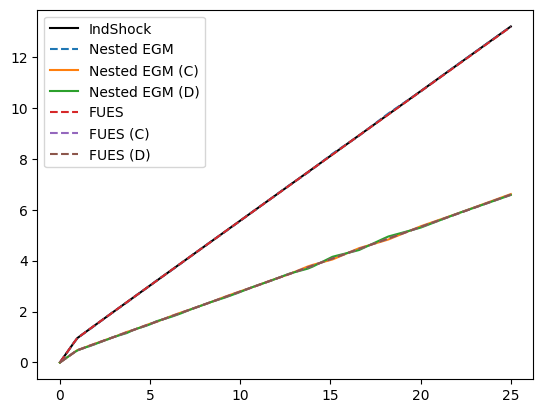

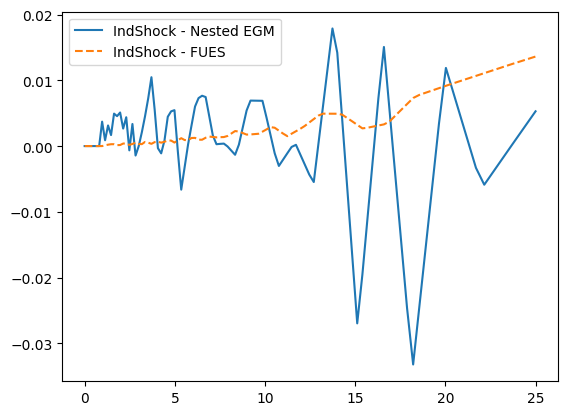

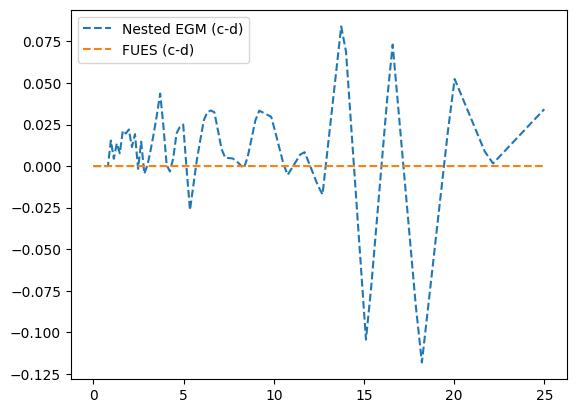

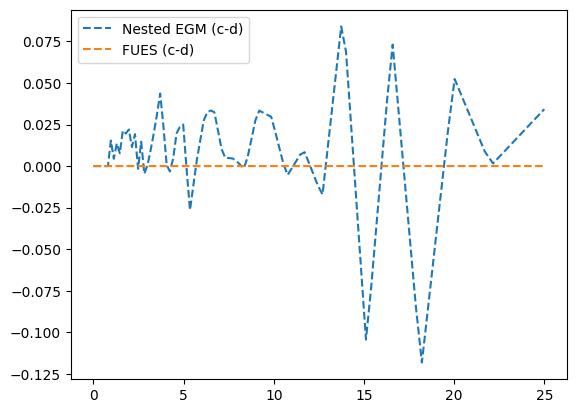

In [12]:
t = 2
plt.plot(mNrmGrid, IndShockExample_OneNonDurable_life.solution[t].cFunc(mNrmGrid), 'black', label = 'IndShock')
plt.plot(mNrmGrid, DurableExample_NestedEGM_TwoNonDurable_life.solution[t].exFunc(nNrmGrid, mNrmGrid), '--', label = 'Nested EGM')
plt.plot(mNrmGrid, DurableExample_NestedEGM_TwoNonDurable_life.solution[t].cFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (C)')
plt.plot(mNrmGrid, DurableExample_NestedEGM_TwoNonDurable_life.solution[t].dFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (D)')
plt.plot(mNrmGrid, DurableExample_FUES_TwoNonDurable_life.solution[t].exFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES')
plt.plot(mNrmGrid, DurableExample_FUES_TwoNonDurable_life.solution[t].cFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES (C)')
plt.plot(mNrmGrid, DurableExample_FUES_TwoNonDurable_life.solution[t].dFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES (D)')
plt.legend()
plt.show()

plt.plot(mNrmGrid, IndShockExample_OneNonDurable_life.solution[t].cFunc(mNrmGrid) - DurableExample_NestedEGM_TwoNonDurable_life.solution[t].exFunc(nNrmGrid, mNrmGrid), label = 'IndShock - Nested EGM')
plt.plot(mNrmGrid, IndShockExample_OneNonDurable_life.solution[t].cFunc(mNrmGrid) - DurableExample_FUES_TwoNonDurable_life.solution[t].exFunc(nNrmGrid, mNrmGrid), '--', label = 'IndShock - FUES')
plt.legend()
plt.show()

plt.plot(mNrmGrid, DurableExample_NestedEGM_TwoNonDurable_life.solution[t].cFunc(nNrmGrid, mNrmGrid) - DurableExample_NestedEGM_TwoNonDurable_life.solution[t].dFunc(nNrmGrid, mNrmGrid), '--', label = 'Nested EGM (c-d)')
plt.plot(mNrmGrid, DurableExample_FUES_TwoNonDurable_life.solution[t].cFunc(nNrmGrid, mNrmGrid) - DurableExample_FUES_TwoNonDurable_life.solution[t].dFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES (c-d)')
plt.legend()
plt.show()

plt.plot(mNrmGrid, DurableExample_NestedEGM_TwoNonDurable_life.solution[t].cFuncAdj(mNrmGrid) - DurableExample_NestedEGM_TwoNonDurable_life.solution[t].dFuncAdj(mNrmGrid), '--', label = 'Nested EGM (c-d)')
plt.plot(mNrmGrid, DurableExample_FUES_TwoNonDurable_life.solution[t].cFuncAdj(mNrmGrid) - DurableExample_FUES_TwoNonDurable_life.solution[t].dFuncAdj(mNrmGrid), '--', label = 'FUES (c-d)')
plt.legend()
plt.show()


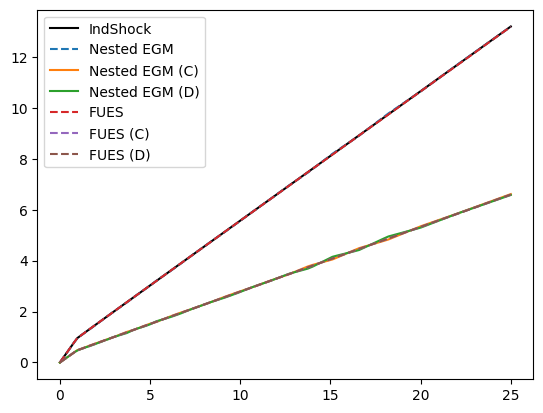

In [13]:
plt.plot(mNrmGrid, IndShockExample_OneNonDurable_life.solution[t].cFunc(mNrmGrid), 'black', label = 'IndShock')
plt.plot(mNrmGrid, DurableExample_NestedEGM_TwoNonDurable_life.solution[t].exFuncAdj(mNrmGrid), '--', label = 'Nested EGM')
plt.plot(mNrmGrid, DurableExample_NestedEGM_TwoNonDurable_life.solution[t].cFuncAdj(mNrmGrid), label = 'Nested EGM (C)')
plt.plot(mNrmGrid, DurableExample_NestedEGM_TwoNonDurable_life.solution[t].dFuncAdj(mNrmGrid), label = 'Nested EGM (D)')
plt.plot(mNrmGrid, DurableExample_FUES_TwoNonDurable_life.solution[t].exFuncAdj(mNrmGrid), '--', label = 'FUES')
plt.plot(mNrmGrid, DurableExample_FUES_TwoNonDurable_life.solution[t].cFuncAdj(mNrmGrid), '--', label = 'FUES (C)')
plt.plot(mNrmGrid, DurableExample_FUES_TwoNonDurable_life.solution[t].dFuncAdj(mNrmGrid), '--', label = 'FUES (D)')
plt.legend()
plt.show()


# Test 3: Frictionless Durable ($\alpha < 1$, $\delta < 0$, $\tau = 0$)
The solution of the drictionless model is the one of the adjuster. As adjusting is costless, the agent chooses the optimal ratio of durable and non-durable expenditure in each period.

In [14]:
### DurableConsumerType: Nested EGM
start = time.time()
DurableExample_NestedEGM_Frictionless_life = DurableConsumerType_NestedEGM(**init_durable)
DurableExample_NestedEGM_Frictionless_life.alpha = 0.5
DurableExample_NestedEGM_Frictionless_life.dDepr = 0.95
DurableExample_NestedEGM_Frictionless_life.nNrmMax = 25
DurableExample_NestedEGM_Frictionless_life.nNrmCount = 100
DurableExample_NestedEGM_Frictionless_life.d_ubar = 0.01
DurableExample_NestedEGM_Frictionless_life.update()
DurableExample_NestedEGM_Frictionless_life.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  3.541691780090332  seconds


In [15]:
### DurableConsumerType: FUES
start = time.time()
DurableExample_FUES_Frictionless_life = DurableConsumerType_FUES(**init_durable)
DurableExample_FUES_Frictionless_life.alpha = 0.5
DurableExample_FUES_Frictionless_life.dDepr = 0.95
DurableExample_FUES_Frictionless_life.nNrmMax = 25
DurableExample_FUES_Frictionless_life.nNrmCount = 100
DurableExample_FUES_Frictionless_life.d_ubar = 0.01
DurableExample_FUES_Frictionless_life.update()
DurableExample_FUES_Frictionless_life.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  2.8858895301818848  seconds


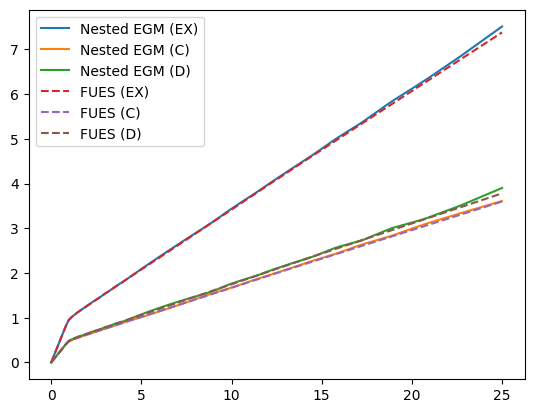

In [16]:
t = 0
plt.plot(mNrmGrid, DurableExample_NestedEGM_Frictionless_life.solution[t].exFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (EX)')
plt.plot(mNrmGrid, DurableExample_NestedEGM_Frictionless_life.solution[t].cFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (C)')
plt.plot(mNrmGrid, DurableExample_NestedEGM_Frictionless_life.solution[t].dFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (D)')
plt.plot(mNrmGrid, DurableExample_FUES_Frictionless_life.solution[t].exFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES (EX)')
plt.plot(mNrmGrid, DurableExample_FUES_Frictionless_life.solution[t].cFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES (C)')
plt.plot(mNrmGrid, DurableExample_FUES_Frictionless_life.solution[t].dFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES (D)')
plt.legend()
plt.show()


### We know from the frictionless model that:
$$
\frac{d}{c} = \Big(\frac{1 - \alpha}{\alpha}\Big)\Big(\frac{R}{(R - 1)+ \delta}\Big)
$$

In [17]:
ratio = ((1 - DurableExample_NestedEGM_Frictionless_life.alpha)/DurableExample_NestedEGM_Frictionless_life.alpha) * (Rfree/(Rfree - 1 + DurableExample_NestedEGM_Frictionless_life.dDepr)) 

C:\Users\adria\AppData\Local\Temp\ipykernel_19064\2637727955.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(mNrmGrid, DurableExample_NestedEGM_Frictionless_life.solution[t].dFunc(nNrmGrid, mNrmGrid) / DurableExample_NestedEGM_Frictionless_life.solution[t].cFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (D/C)')
C:\Users\adria\AppData\Local\Temp\ipykernel_19064\2637727955.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(mNrmGrid, DurableExample_FUES_Frictionless_life.solution[t].dFunc(nNrmGrid, mNrmGrid) / DurableExample_FUES_Frictionless_life.solution[t].cFunc(nNrmGrid, mNrmGrid), label = 'FUES (D/C)')


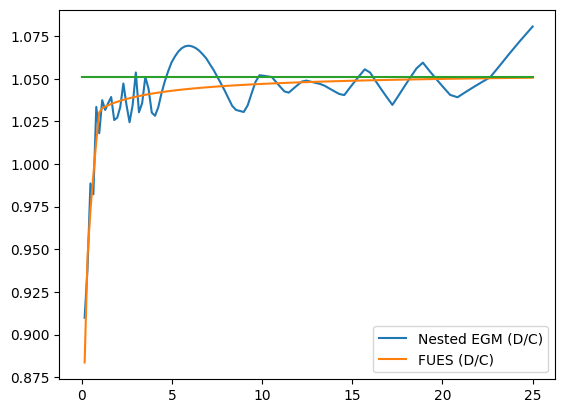

In [18]:
### Graph
t = 0
plt.plot(mNrmGrid, DurableExample_NestedEGM_Frictionless_life.solution[t].dFunc(nNrmGrid, mNrmGrid) / DurableExample_NestedEGM_Frictionless_life.solution[t].cFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (D/C)')
plt.plot(mNrmGrid, DurableExample_FUES_Frictionless_life.solution[t].dFunc(nNrmGrid, mNrmGrid) / DurableExample_FUES_Frictionless_life.solution[t].cFunc(nNrmGrid, mNrmGrid), label = 'FUES (D/C)')
plt.plot(mNrmGrid, np.ones_like(mNrmGrid)* ratio)
plt.legend()
plt.show()

# Test 4: General Durable Case ($\alpha < 1$, $\delta < 0$, $\tau > 0$)
In this case, we have frictions and therefore discontinuities in the policy functions.

In [19]:
### DurableConsumerType: Nested EGM
start = time.time()
DurableExample_NestedEGM_General_life = DurableConsumerType_NestedEGM(**init_durable)
DurableExample_NestedEGM_General_life.alpha = 0.5
DurableExample_NestedEGM_General_life.dDepr = 0.9
DurableExample_NestedEGM_General_life.adjC = 0.1
DurableExample_NestedEGM_General_life.nNrmMax = 10
DurableExample_NestedEGM_General_life.nNrmCount = 100
DurableExample_NestedEGM_General_life.mNrmMax = 20
DurableExample_NestedEGM_General_life.d_ubar = 0.01
DurableExample_NestedEGM_General_life.update()
DurableExample_NestedEGM_General_life.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  3.441011428833008  seconds


In [20]:
### DurableConsumerType: FUES
start = time.time()
DurableExample_FUES_General_life = DurableConsumerType_FUES(**init_durable)
DurableExample_FUES_General_life.alpha = 0.5
DurableExample_FUES_General_life.dDepr = 0.9
DurableExample_FUES_General_life.adjC = 0.1
DurableExample_FUES_General_life.nNrmMax = 5
DurableExample_FUES_General_life.nNrmCount = 100
DurableExample_FUES_General_life.mNrmMax = 20
# DurableExample_FUES_General_life.maXtraMax = 100
DurableExample_FUES_General_life.d_ubar = 0.01
DurableExample_FUES_General_life.update()
DurableExample_FUES_General_life.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  17.249605655670166  seconds


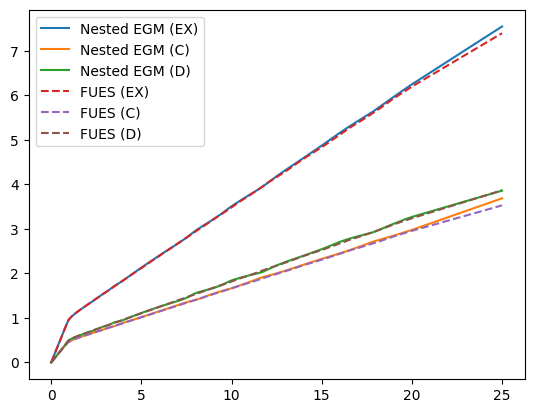

In [21]:
t = 0
plt.plot(mNrmGrid, DurableExample_NestedEGM_General_life.solution[t].exFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (EX)')
plt.plot(mNrmGrid, DurableExample_NestedEGM_General_life.solution[t].cFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (C)')
plt.plot(mNrmGrid, DurableExample_NestedEGM_General_life.solution[t].dFunc(nNrmGrid, mNrmGrid), label = 'Nested EGM (D)')
plt.plot(mNrmGrid, DurableExample_FUES_General_life.solution[t].exFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES (EX)')
plt.plot(mNrmGrid, DurableExample_FUES_General_life.solution[t].cFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES (C)')
plt.plot(mNrmGrid, DurableExample_FUES_General_life.solution[t].dFunc(nNrmGrid, mNrmGrid), '--', label = 'FUES (D)')
plt.legend()
plt.show()


In [22]:
decision_function_latest(DurableExample_FUES_General_life)

interactive(children=(Dropdown(description='t', options=(0, 1, 2, 3), value=0), Dropdown(description='name', o…

In [23]:
decision_function_latest(DurableExample_NestedEGM_General_life)

interactive(children=(Dropdown(description='t', options=(0, 1, 2, 3), value=0), Dropdown(description='name', o…

### Infinite horizon
The more accurate policy functions allows us to converge faster to the infinite horizon model.

In [25]:
### DurableConsumerType: Nested EGM
start = time.time()
DurableExample_NestedEGM_General_inf = deepcopy(DurableExample_NestedEGM_General_life)
DurableExample_NestedEGM_General_inf.cycles = 0
DurableExample_NestedEGM_General_inf.update()
DurableExample_NestedEGM_General_inf.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  646.2868347167969  seconds


In [26]:
### DurableConsumerType: FUES
start = time.time()
DurableExample_FUES_General_inf = deepcopy(DurableExample_FUES_General_life)
DurableExample_FUES_General_inf.cycles = 0
DurableExample_FUES_General_inf.update()
DurableExample_FUES_General_inf.solve()#(verbose=False)
end = time.time()
time_Durable = end - start
print("time used: ", time_Durable, " seconds")

time used:  435.9563453197479  seconds


In [29]:
DurableExample_NestedEGM_General_inf.completed_cycles

170

In [30]:
DurableExample_FUES_General_inf.completed_cycles

145

In [27]:
decision_function_latest(DurableExample_NestedEGM_General_inf)

interactive(children=(Dropdown(description='t', options=(0, 1, 2, 3), value=0), Dropdown(description='name', o…

In [28]:
decision_function_latest(DurableExample_FUES_General_inf)

interactive(children=(Dropdown(description='t', options=(0, 1, 2, 3), value=0), Dropdown(description='name', o…